In [6]:
# Import libraries we need

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [7]:
# Lire le fichier CSV
dataset = pd.read_csv(r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/titre_positions3.csv")

# Définir la colonne "image" comme index
dataset = dataset.set_index("image")


In [8]:
# Créer les colonnes séparées
dataset['position'] = dataset['position'].str.strip('()')  # Supprimer les parenthèses
dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

# Supprimer la colonne "position"
dataset = dataset.drop('position', axis=1)

# Afficher les premières lignes du DataFrame mis à jour
print(dataset.head())

                x1    x2    y1    y2
image                               
tt2321249.jpg    0     0   300   464
tt1477076.jpg    0     0   300   444
tt0089504.jpg   44   335   234    57
tt0089504.jpg    0     0   300   425
tt0086637.jpg  137   415   127    31


In [9]:
# Convert categorical variable into integers 
X = dataset
leUnivers = LabelEncoder()

X["x1"] = leUnivers.fit_transform(X["x1"])
X["x2"] = leUnivers.fit_transform(X["x2"])
X["y2"] = leUnivers.fit_transform(X["y2"])
X["y1"] = leUnivers.fit_transform(X["y1"])

In [10]:
# Feature scalling
cols = X.columns
ms = MinMaxScaler()
ms.fit(X)
X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

# réduction de dimension
pca = PCA()
pca.fit(X)
df = pca.transform(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

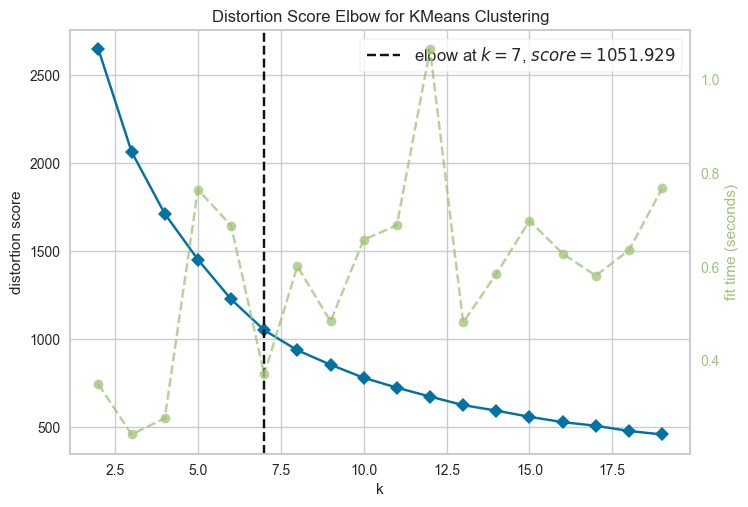

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
#Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timings=True)
visualizer.fit(df)
visualizer.show()

In [12]:
# Clustering
kmeans = KMeans(n_clusters=7) 

# result = kmeans.fit(X)
kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)
print(label)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 2 ... 0 0 0]


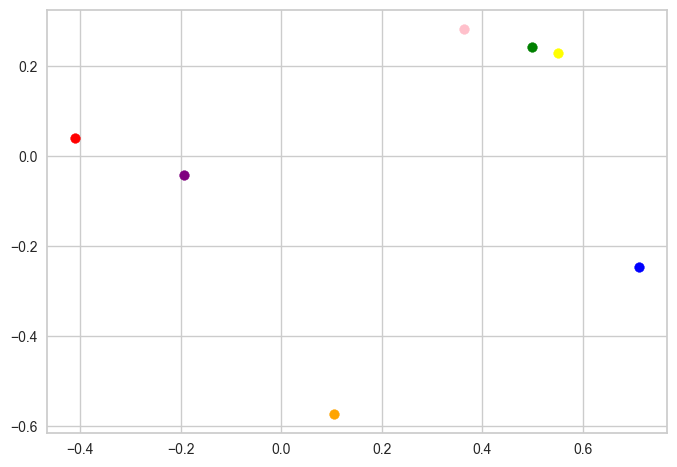

In [13]:
# display clusters center
cluster_center = kmeans.cluster_centers_

plt.scatter(cluster_center[0, 0], cluster_center[0, 1], color="red")
plt.scatter(cluster_center[1, 0], cluster_center[1, 1], color="green")
plt.scatter(cluster_center[2, 0], cluster_center[2, 1], color="blue")
plt.scatter(cluster_center[3, 0], cluster_center[3, 1], color="purple")
plt.scatter(cluster_center[4, 0], cluster_center[4, 1], color="pink")
plt.scatter(cluster_center[5, 0], cluster_center[5, 1], color="orange")
plt.scatter(cluster_center[6, 0], cluster_center[6, 1], color="yellow")
plt.show()

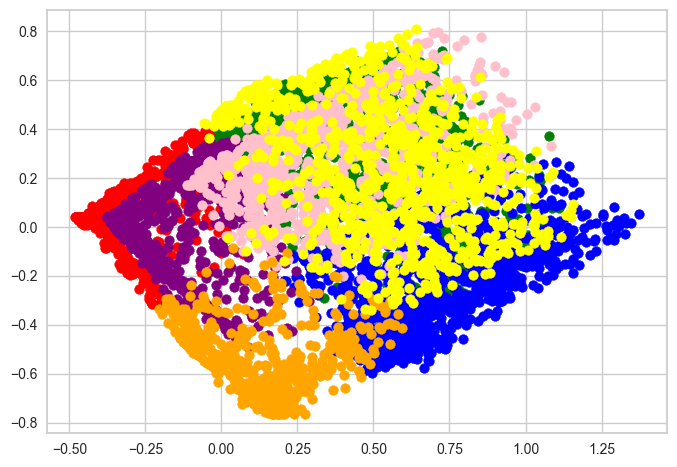

In [14]:
# Display clusters center
cluster_center = kmeans.cluster_centers_

# Définir une liste de couleurs pour les clusters
colors = ["red", "green", "blue", "purple", "pink", "orange", "yellow"]

# Parcourir chaque cluster
for i in range(len(cluster_center)):
    # Filtrer les données pour le cluster actuel
    filtered_data = df[label == i]
    
    # Afficher les points du cluster
    plt.scatter(filtered_data[:, 0], filtered_data[:, 1], color=colors[i])

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

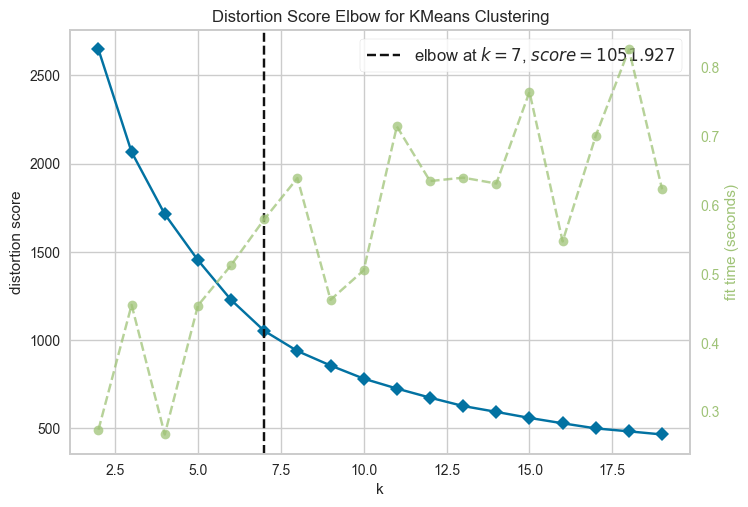

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
##Création du fichier CSV 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Lire le fichier CSV
dataset = pd.read_csv(r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/titre_positions3.csv")

# Définir la colonne "image" comme index
dataset = dataset.set_index("image")

# Créer les colonnes séparées
dataset['position'] = dataset['position'].str.strip('()')  # Supprimer les parenthèses
dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

# Supprimer la colonne "position"
dataset = dataset.drop('position', axis=1)

# Convert categorical variable into integers 
X = dataset
leUnivers = LabelEncoder()

X["x1"] = leUnivers.fit_transform(X["x1"])
X["x2"] = leUnivers.fit_transform(X["x2"])
X["y2"] = leUnivers.fit_transform(X["y2"])
X["y1"] = leUnivers.fit_transform(X["y1"])

# Feature scaling
cols = X.columns
ms = MinMaxScaler()
ms.fit(X)
X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])

# Réduction de dimension
pca = PCA()
pca.fit(X)
df = pca.transform(X)

# Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20), timings=True)
visualizer.fit(df)
visualizer.show()

# Clustering
kmeans = KMeans(n_clusters=7)

kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)

# Créer une nouvelle colonne dans le DataFrame pour stocker les labels de cluster
dataset['cluster'] = label

# Créer un DataFrame contenant le nom de la photo et le cluster
resultats_clusters = dataset[['cluster']].reset_index()




                x1    x2    y1    y2
image                               
tt2321249.jpg    0     0   300   464
tt1477076.jpg    0     0   300   444
tt0089504.jpg   44   335   234    57
tt0089504.jpg    0     0   300   425
tt0086637.jpg  137   415   127    31


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

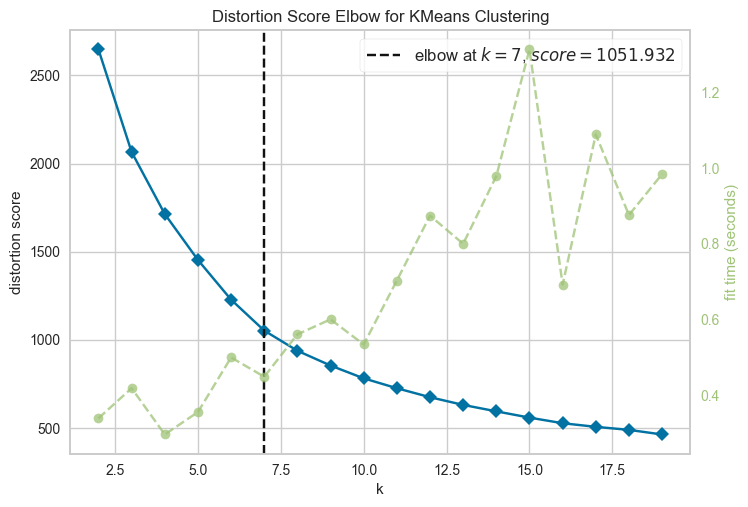

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 1 ... 2 2 2]


In [18]:
# Import libraries we need

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Lire le fichier CSV
dataset = pd.read_csv(r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/titre_positions3.csv")

# Définir la colonne "image" comme index
dataset = dataset.set_index("image")

# Créer les colonnes séparées
dataset['position'] = dataset['position'].str.strip('()')  # Supprimer les parenthèses
dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

# Supprimer la colonne "position"
dataset = dataset.drop('position', axis=1)

# Convert categorical variable into integers 
X = dataset
leUnivers = LabelEncoder()

X["x1"] = leUnivers.fit_transform(X["x1"])
X["x2"] = leUnivers.fit_transform(X["x2"])
X["y2"] = leUnivers.fit_transform(X["y2"])
X["y1"] = leUnivers.fit_transform(X["y1"])

# Feature scalling
cols = X.columns
ms = MinMaxScaler()
ms.fit(X)
X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

# réduction de dimension
pca = PCA()
pca.fit(X)
df = pca.transform(X)

#Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timings=True)
visualizer.fit(df)
visualizer.show()

# Clustering
kmeans = KMeans(n_clusters=7) 

# result = kmeans.fit(X)
kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)
print(label)



In [55]:
x1 = 0
x2 = 0
y1 = 300
y2 = 464

cluster = determine_title_cluster2(x1, x2, y1, y2)
print("Cluster du titre :", cluster)


Cluster du titre : 6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warn

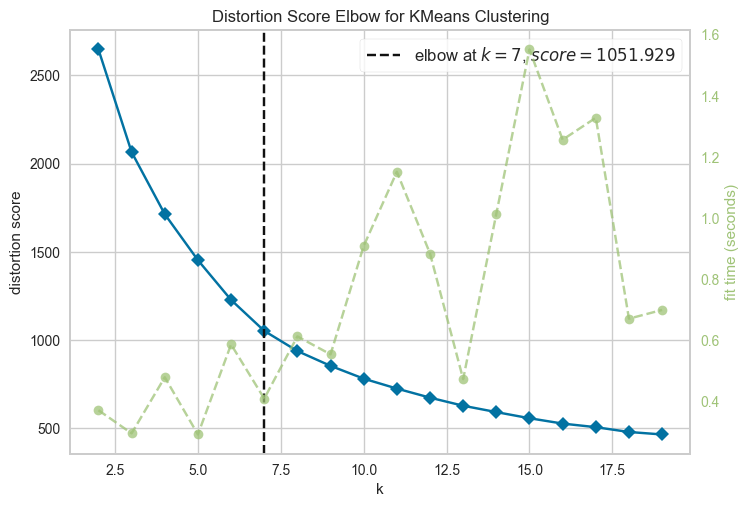

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Terminé. Les informations de cluster ont été enregistrées dans /Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/resultats_clusters30.csv


In [67]:
##Création du fichier CSV 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import pickle

# Lire le fichier CSV
dataset = pd.read_csv(r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/titre_positions3.csv")

# Définir la colonne "image" comme index
dataset = dataset.set_index("image")

# Créer les colonnes séparées
dataset['position'] = dataset['position'].str.strip('()')  # Supprimer les parenthèses
dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

# Supprimer la colonne "position"
dataset = dataset.drop('position', axis=1)

# Convert categorical variable into integers 
X = dataset
leUnivers = LabelEncoder()

X["x1"] = leUnivers.fit_transform(X["x1"])
X["x2"] = leUnivers.fit_transform(X["x2"])
X["y2"] = leUnivers.fit_transform(X["y2"])
X["y1"] = leUnivers.fit_transform(X["y1"])

# Feature scaling
cols = X.columns
ms = MinMaxScaler()
ms.fit(X)
X = ms.transform(X)
X = pd.DataFrame(X, columns=[cols])

# Réduction de dimension
pca = PCA()
pca.fit(X)
df = pca.transform(X)

# Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20), timings=True)
visualizer.fit(df)
visualizer.show()

# Clustering
kmeans = KMeans(n_clusters=7)

kmeansFit = kmeans.fit(df)
label = kmeansFit.predict(df)

# Enregistrer les données des clusters dans un fichier
filename = "/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/pickle/clusters_data2.pkl"
with open(filename, 'wb') as file:
    pickle.dump(kmeansFit, file)

# Créer une nouvelle colonne dans le DataFrame pour stocker les labels de cluster
dataset['cluster'] = label

# Créer un DataFrame contenant le nom de la photo et le cluster
resultats_clusters = dataset[['cluster']].reset_index()

# Enregistrer les résultats dans un fichier CSV
chemin_fichier_resultats = r"/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/resultc/resultats_clusters30.csv"
resultats_clusters.to_csv(chemin_fichier_resultats, index=False)

print("Terminé. Les informations de cluster ont été enregistrées dans", chemin_fichier_resultats)

In [ ]:
####### Brou

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import pickle
import numpy as np

def predict_cluster(image_path):

     # Chargement de l'image
    img = cv2.imread(image_path)

    # Conversion de l'image en niveaux de gris
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Application d'un seuillage pour obtenir un masque binaire
    _, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Suppression du bruit avec une opération de fermeture morphologique
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    # Recherche des contours dans l'image
    contours, _ = cv2.findContours(closed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Parcours des contours et extraction des titres avec leur position
    titles = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 100 and h > 20:  # Filtre pour exclure les petits contours indésirables
            title_img = gray_img[y:y+h, x:x+w]
            title_text = pytesseract.image_to_string(title_img)
            titles.append({"text": title_text.strip(), "position": (x, y, w, h)})

###############

    dataset = []
    for title in titles:
            dataset.append({'image': 1, 'position': title["position"]})

    dataset = pd.DataFrame(dataset)


    # Définir la colonne "image" comme index
    dataset = dataset.set_index("image")


    # Créer les colonnes séparées
    dataset['position'] = dataset['position'].astype(str).str.strip('()')  # Convertir en chaînes de caractères et supprimer les parenthèses
    dataset[['x1', 'x2', 'y1', 'y2']] = dataset['position'].str.split(',', expand=True)  # Séparer les chiffres par des virgules

    # Supprimer la colonne "position"
    dataset = dataset.drop('position', axis=1)
    # Convert categorical variables into integers
        # Convert categorical variables into integers
    # Convert categorical variables into integers
    X = dataset.copy()
    leUnivers = LabelEncoder()

    # Convert the columns to numeric type
    X['x1'] = X['x1'].astype(int)
    X['x2'] = X['x2'].astype(int)
    X['y1'] = X['y1'].astype(int)
    X['y2'] = X['y2'].astype(int)

    # Feature scaling
    cols = ['x1', 'x2', 'y1', 'y2']
    ms = MinMaxScaler()
    X[cols] = ms.fit_transform(X[cols])

    # Dimension reduction
    pca = PCA()
    X_pca = pca.fit_transform(X[cols])

    # Load cluster data from file
    filename = "/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/pickle/clusters_data4.pkl"
    with open(filename, 'rb') as file:
        kmeansFit = pickle.load(file)

    # Predict clusters for samples
    predicted_labels = kmeansFit.predict(X[cols])

    return predicted_labels[0]




# Exemple d'utilisation
image_path = "/Users/dimitriraymond/Documents/Epitech/Semestre 2/DAT/data/Multi_Label_dataset/Images/tt0092656.jpg"
detected_titles = predict_cluster(image_path)

print(detected_titles)
